In [10]:
%matplotlib inline
%run /Users/marisa/git/practice/Sampler.py
import matplotlib.pyplot as plt
import pymc3 as pm
import numpy as np
import pandas as pd

In [2]:
df2 = getAndCleanPrecip()
df2.shape

/Users/marisa/miniconda3/envs/py3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (19,25,26,27,28,29,35,36,41,42,43,48,49,51,53,55,56,58,59,60,62,63,117,119) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


(3285, 2)

In [4]:
with pm.Model() as linear_model:
    lambdaVar = pm.Gamma('lambda', alpha=1, beta=1)
    y_observed = pm.Exponential('y_observed',
                           lam=lambdaVar,
                           observed=df2['precipNum'])

    prior = pm.sample_prior_predictive()
    posterior = pm.sample()
    posterior_pred = pm.sample_posterior_predictive(posterior)

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (2 chains in 2 jobs)


NUTS: [lambda]


Sampling 2 chains:   0%|          | 0/2000 [00:00<?, ?draws/s]

Sampling 2 chains:  10%|█         | 205/2000 [00:00<00:00, 2048.59draws/s]

Sampling 2 chains:  20%|██        | 409/2000 [00:00<00:00, 2042.80draws/s]

Sampling 2 chains:  36%|███▌      | 711/2000 [00:00<00:00, 2262.13draws/s]

Sampling 2 chains:  52%|█████▏    | 1040/2000 [00:00<00:00, 2495.49draws/s]

Sampling 2 chains:  69%|██████▉   | 1385/2000 [00:00<00:00, 2720.69draws/s]

Sampling 2 chains:  86%|████████▋ | 1725/2000 [00:00<00:00, 2892.32draws/s]

Sampling 2 chains: 100%|██████████| 2000/2000 [00:00<00:00, 2858.31draws/s]

The acceptance probability does not match the target. It is 0.8996867681681029, but should be close to 0.8. Try to increase the number of tuning steps.


The acceptance probability does not match the target. It is 0.8904882036502313, but should be close to 0.8. Try to increase the number of tuning steps.


  0%|          | 0/1000 [00:00<?, ?it/s]

 20%|██        | 202/1000 [00:00<00:00, 2011.74it/s]

 51%|█████     | 509/1000 [00:00<00:00, 2243.77it/s]

 83%|████████▎ | 830/1000 [00:00<00:00, 2466.20it/s]

100%|██████████| 1000/1000 [00:00<00:00, 2826.60it/s]

In [5]:
list(posterior_pred)

['y_observed']

In [16]:
listOfDict = [{'a': 1, 'b':'sdf'}, {'a': 7, 'b': 'jhjh'}]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13a487d30>,
      dtype=object)

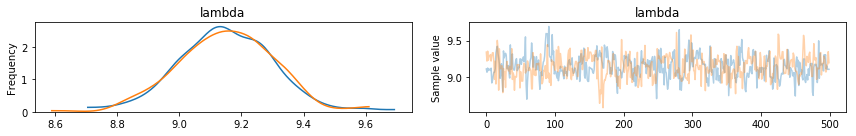

In [29]:
pm.plots.traceplot(posterior)